# Two approaches of NLP-Classification : Traditional vs PyCaret

# Approach 1 : Traditional Method

Stage 1a : Data setup 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/SMS_Spam_Ham_Raw.csv')

In [3]:
df1.columns

Index(['Flag', 'SMS '], dtype='object')

In [4]:
df1.rename(columns={'SMS ':'SMS_Original'}, inplace=True)

In [5]:
display(df1.head())
display(df1.tail())

,Flag,SMS_Original
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


,Flag,SMS_Original
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [6]:
df1.profile_report()

In [7]:
df1 = pd.get_dummies(df1, columns=['Flag'], drop_first=True)
display(df1.head())
display(df1.tail())

,SMS_Original,Flag_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


,SMS_Original,Flag_spam
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ã¼ b going to esplanade fr home?,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0
5573,Rofl. Its true to its name,0


In [8]:
df2 = df1
df2 = df2[['Flag_spam','SMS_Original']]
display(df2.head())
display(df2.tail())

,Flag_spam,SMS_Original
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


,Flag_spam,SMS_Original
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will Ã¼ b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...
5573,0,Rofl. Its true to its name


Stage 1b : Pre-processing on the Text data

In [9]:
import re
from bs4 import BeautifulSoup

In [10]:
# Remove HTTP tags
%time df2['SMS_Processed'] = df2['SMS_Original'].map(lambda x : ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))
df2.head()

Wall time: 235 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...


In [11]:
#Lower Case
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: x.lower())
df2.head()

Wall time: 68.7 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [12]:
#Remove punctuations
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x: re.sub(r'[^\w\s]', '', x))
df2.head()

Wall time: 94.6 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [13]:
#Remove unicodes
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : re.sub(r'[^\x00-\x7F]+',' ', x))
df2.head()

Wall time: 102 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives arou...


In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 

In [15]:
# Remove stopwords
stop_words = stopwords.words('english')
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
df2.head()

Wall time: 296 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [16]:
# Lemmatize the text
lemmer = WordNetLemmatizer()

%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([lemmer.lemmatize(w) for w in x.split() if w not in stop_words]))
df2.head()

Wall time: 2.54 s


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


In [17]:
#Removing Stop words again after Lemmatize
%time df2['SMS_Processed'] = df2['SMS_Processed'].map(lambda x : ' '.join([w for w in x.split() if w not in stop_words]))
display(df2.head())
display(df2.tail())

Wall time: 273 ms


,Flag_spam,SMS_Original,SMS_Processed
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf life around though


,Flag_spam,SMS_Original,SMS_Processed
5569,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5570,0,Will Ã¼ b going to esplanade fr home?,b going esplanade fr home
5571,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5572,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...
5573,0,Rofl. Its true to its name,rofl true name


Stage 2 : Embedding on the processed text data

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

Before we move further, lets do some exploratory analysis by finding the most common and rare words

In [19]:
#funtion to get 'top N' or 'bottom N' words

def get_n_words(corpus, direction, n):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [20]:
#10 most common and 10 most rare words
common_words = get_n_words(df2['SMS_Processed'], "top", 15)
rare_words = get_n_words(df2['SMS_Processed'], "bottom", 15)

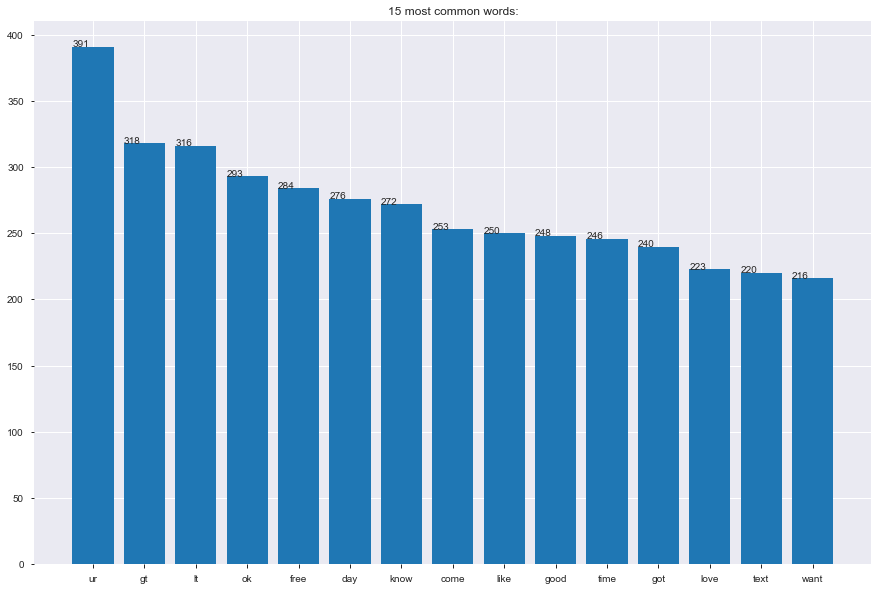

In [21]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

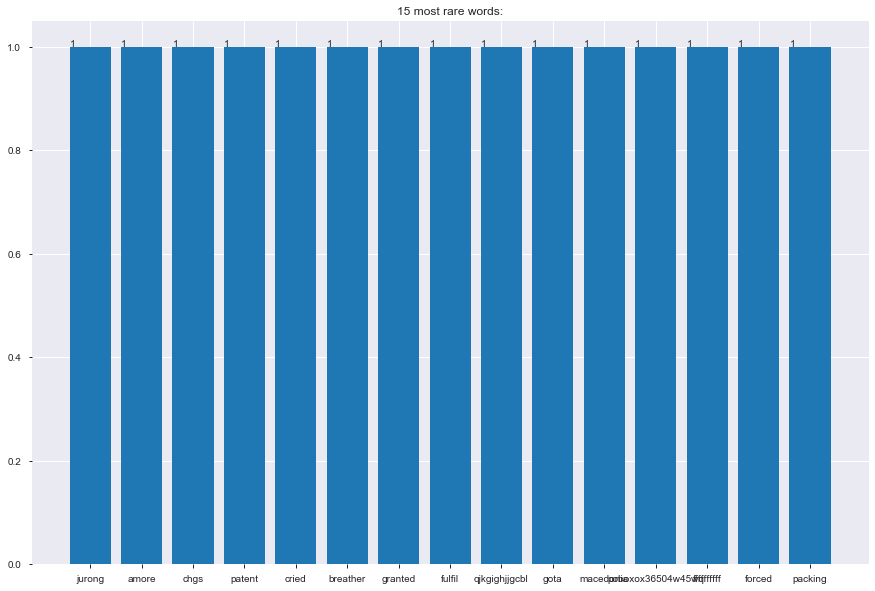

In [22]:
rare_words = dict(rare_words)
names = list(rare_words.keys())
values = list(rare_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(rare_words)),values,tick_label=names)
plt.title('15 most rare words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .001, yval)
plt.show()

In [23]:
# BOW-TF Embedding

no_features = 800
tf_vectorizer = CountVectorizer(min_df=.015, max_df=.8, max_features=no_features, ngram_range=[1, 3])

%time tpl_tf = tf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF :", tpl_tf.shape)
df_tf = pd.DataFrame(tpl_tf.toarray(), columns=tf_vectorizer.get_feature_names())
display(df_tf.head())

Wall time: 485 ms


'Bow-TF :'

(5574, 77)

,already,back,call,claim,co,come,da,day,dear,dont,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Preparing processed and BoW-TF embedded data for Classification
df_tf_m = pd.concat([df2, df_tf], axis = 1)
df_tf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tf_m.shape)
display(df_tf_m.head())
display(df_tf_m.tail())

(5574, 78)


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,Flag_spam,already,back,call,claim,co,come,da,day,dear,...,ur,want,wat,way,week,well,work,www,yeah,yes
5569,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# BoW-TF:IDF Embedding
tfidf_vectorizer = TfidfVectorizer(min_df=.02, max_df=.7, ngram_range=[1,3])

%time tpl_tfidf = tfidf_vectorizer.fit_transform(df2['SMS_Processed'])
display("Bow-TF:IDF :", tpl_tfidf.shape)
df_tfidf = pd.DataFrame(tpl_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names(), index=df2.index)
display(df_tfidf.head())

Wall time: 480 ms


'Bow-TF:IDF :'

(5574, 53)

,back,call,co,come,da,day,dont,free,get,go,...,tell,text,think,time,today,txt,ur,want,week,well
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.686387,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556018,0.0,0.000000,...,0.0,0.575908,0.000000,0.0,0.0,0.599312,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.647166,...,0.0,0.000000,0.762349,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [26]:
#Preparing processed and BoW-TF:IDF embedded data for Classification
df_tfidf_m = pd.concat([df2, df_tfidf], axis = 1)
df_tfidf_m.drop(columns=['SMS_Original', 'SMS_Processed'], inplace = True)
print(df_tfidf_m.shape)
display(df_tfidf_m.head())
display(df_tfidf_m.tail())

(5574, 54)


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.556018,0.0,...,0.0,0.575908,0.000000,0.0,0.0,0.599312,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.762349,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


,Flag_spam,back,call,co,come,da,day,dont,free,get,...,tell,text,think,time,today,txt,ur,want,week,well
5569,1,0.0,0.618628,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.785684,0.0,0.0,0.0,0.0,0.000000,0.0
5570,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5571,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
5572,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.549964,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.630038,0.0
5573,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0


Stage 3 : Model Building

In [27]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [28]:
#function to prepare Confusion Matrix, RoC-AUC curve, and relvant statistics

def clf_report(Y_test, Y_pred, probs):
    print("\n", "Confusion Matrix")
    cm = confusion_matrix(Y_test, Y_pred)
    #print("\n", cm, "\n")
    sns.heatmap(cm, square=True, annot=True, cbar=False, fmt = 'g', cmap='RdBu',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print("\n", "Classification Report", "\n")
    print(classification_report(Y_test, Y_pred))
    print("Overall Accuracy : ", round(accuracy_score(Y_test, Y_pred) * 100, 2))
    print("Precision Score : ", round(precision_score(Y_test, Y_pred, average='binary') * 100, 2))
    print("Recall Score : ", round(recall_score(Y_test, Y_pred, average='binary') * 100, 2))
    preds = probs[:,1] # this is the probability for 1, column 0 has probability for 0. Prob(0) + Prob(1) = 1
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    print("AUC : ", round(roc_auc * 100, 2), "\n")
    #display(probs)
    #print("Cutoff Probability : ", preds)
    plt.figure()
    plt.plot(fpr, tpr, label='Best Model on Test Data (area = %0.2f)' % roc_auc)
    plt.plot([0.0, 1.0], [0, 1],'r--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('RoC-AUC on Test Data')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print("--------------------------------------------------------------------------")

In [29]:
#function to prepare different Classification models

def model_dvt(df):
    Y = df['Flag_spam']
    X = df.drop('Flag_spam', axis = 1)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
    print("Train Data Dimensions : ", X_train.shape)
    print("Test Data Dimensions : ", X_test.shape)
    
    print("\n", 'Random Forest Classifier')
    clf = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'AdaBoost Classifier')
    clf = AdaBoostClassifier(n_estimators=200,random_state=21)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Grdient Boosting Classifier')
    clf = GradientBoostingClassifier(n_estimators=100, max_depth=1, random_state=21, learning_rate=1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)
    
    print("\n", 'Naive Bayes Classifier')
    clf = MultinomialNB(alpha = 1.0)
    %time clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    probs = clf.predict_proba(X_test)
    clf_report(Y_test, Y_pred, probs)

Models on Term Frequency - Bag of Words data
Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)

 Random Forest Classifier
Wall time: 1.79 s

 Confusion Matrix


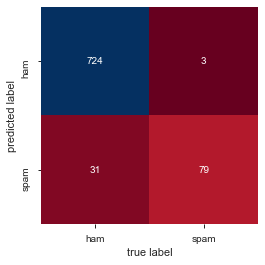


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.72      0.82       110

    accuracy                           0.96       837
   macro avg       0.96      0.86      0.90       837
weighted avg       0.96      0.96      0.96       837

Overall Accuracy :  95.94
Precision Score :  96.34
Recall Score :  71.82
AUC :  96.21 



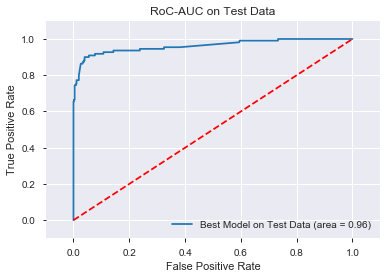

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 2.17 s

 Confusion Matrix


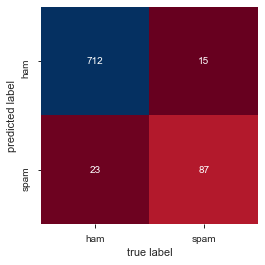


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.85      0.79      0.82       110

    accuracy                           0.95       837
   macro avg       0.91      0.89      0.90       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.46
Precision Score :  85.29
Recall Score :  79.09
AUC :  97.04 



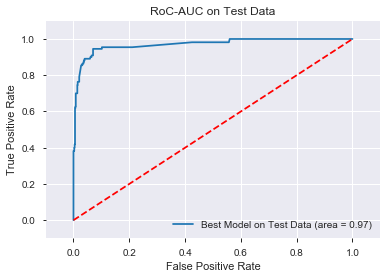

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 373 ms

 Confusion Matrix


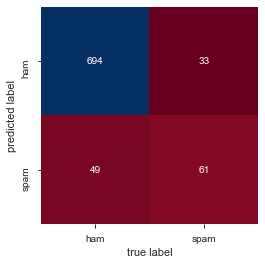


 Classification Report 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       727
           1       0.65      0.55      0.60       110

    accuracy                           0.90       837
   macro avg       0.79      0.75      0.77       837
weighted avg       0.90      0.90      0.90       837

Overall Accuracy :  90.2
Precision Score :  64.89
Recall Score :  55.45
AUC :  65.73 



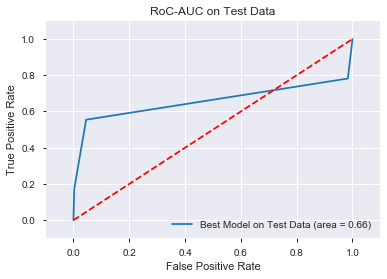

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 5.97 ms

 Confusion Matrix


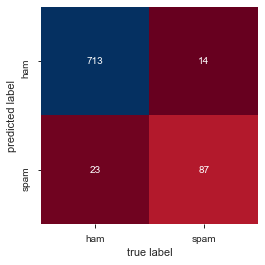


 Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       727
           1       0.86      0.79      0.82       110

    accuracy                           0.96       837
   macro avg       0.92      0.89      0.90       837
weighted avg       0.95      0.96      0.95       837

Overall Accuracy :  95.58
Precision Score :  86.14
Recall Score :  79.09
AUC :  96.41 



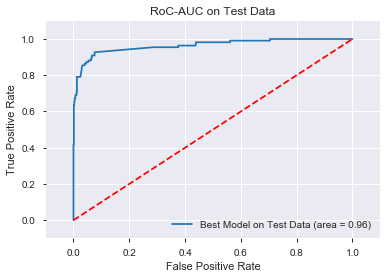

--------------------------------------------------------------------------
Wall time: 6.64 s


In [30]:
print('Models on Term Frequency - Bag of Words data')
%time model_dvt(df_tf_m)

Models on Term Frequency - Bag of Words: Inverse Document Frequency data
Train Data Dimensions :  (4737, 53)
Test Data Dimensions :  (837, 53)

 Random Forest Classifier
Wall time: 1.86 s

 Confusion Matrix


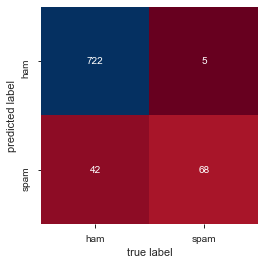


 Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       727
           1       0.93      0.62      0.74       110

    accuracy                           0.94       837
   macro avg       0.94      0.81      0.86       837
weighted avg       0.94      0.94      0.94       837

Overall Accuracy :  94.38
Precision Score :  93.15
Recall Score :  61.82
AUC :  95.36 



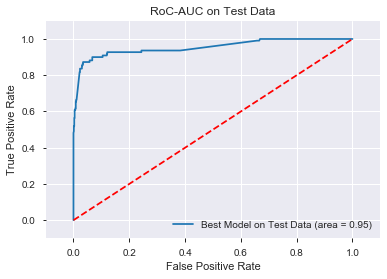

--------------------------------------------------------------------------

 AdaBoost Classifier
Wall time: 1.3 s

 Confusion Matrix


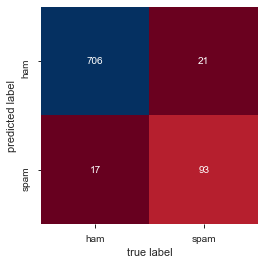


 Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       727
           1       0.82      0.85      0.83       110

    accuracy                           0.95       837
   macro avg       0.90      0.91      0.90       837
weighted avg       0.96      0.95      0.95       837

Overall Accuracy :  95.46
Precision Score :  81.58
Recall Score :  84.55
AUC :  94.6 



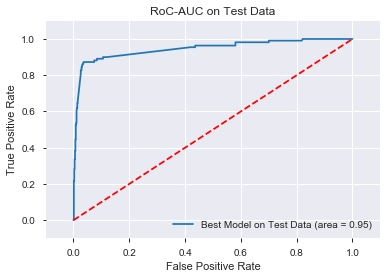

--------------------------------------------------------------------------

 Grdient Boosting Classifier
Wall time: 293 ms

 Confusion Matrix


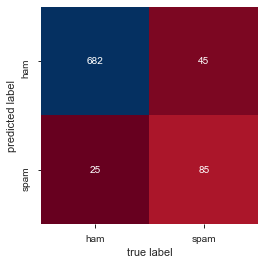


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       727
           1       0.65      0.77      0.71       110

    accuracy                           0.92       837
   macro avg       0.81      0.86      0.83       837
weighted avg       0.92      0.92      0.92       837

Overall Accuracy :  91.64
Precision Score :  65.38
Recall Score :  77.27
AUC :  85.85 



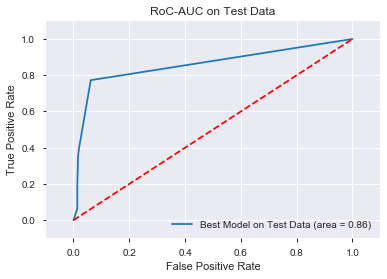

--------------------------------------------------------------------------

 Naive Bayes Classifier
Wall time: 6.2 ms

 Confusion Matrix


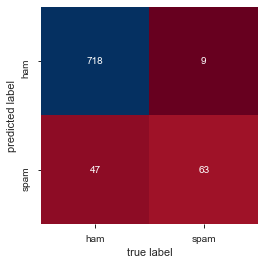


 Classification Report 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       727
           1       0.88      0.57      0.69       110

    accuracy                           0.93       837
   macro avg       0.91      0.78      0.83       837
weighted avg       0.93      0.93      0.93       837

Overall Accuracy :  93.31
Precision Score :  87.5
Recall Score :  57.27
AUC :  94.62 



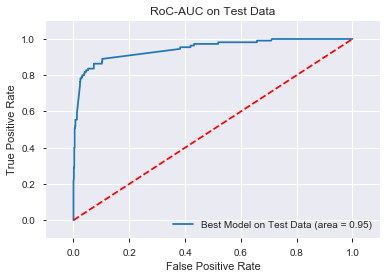

--------------------------------------------------------------------------
Wall time: 5.61 s


In [31]:
print('Models on Term Frequency - Bag of Words: Inverse Document Frequency data')
%time model_dvt(df_tfidf_m)

Stage 4 : Hyper-parameter tuning models that used TF-BoW embedding data

In [32]:
from sklearn.model_selection import GridSearchCV

Grid-Search hyperparameter tuning on AdaBoost Classifier

In [33]:
Y = df_tf_m['Flag_spam']
X = df_tf_m.drop('Flag_spam', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.85, random_state = 21)
print("Train Data Dimensions : ", X_train.shape)
print("Test Data Dimensions : ", X_test.shape)

Train Data Dimensions :  (4737, 77)
Test Data Dimensions :  (837, 77)


In [34]:
#Creating a grid of hyperparameters
grid_params = {'n_estimators' : [100,200,300],
               'learning_rate' : [1.0, 0.1, 0.05]}

ABC = AdaBoostClassifier()
#Building a 10 fold CV GridSearchCV object
grid_object = GridSearchCV(estimator = ABC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

#Fitting the grid to the training data
%time grid_object.fit(X_train, Y_train)

Wall time: 1min 20s


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1, 0.05],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Best Parameters :  {'learning_rate': 0.1, 'n_estimators': 300}
Best_ROC-AUC :  96.05
Best model :  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)

 Confusion Matrix


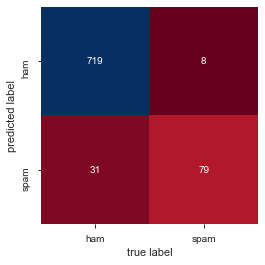


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       727
           1       0.91      0.72      0.80       110

    accuracy                           0.95       837
   macro avg       0.93      0.85      0.89       837
weighted avg       0.95      0.95      0.95       837

Overall Accuracy :  95.34
Precision Score :  90.8
Recall Score :  71.82
AUC :  96.61 



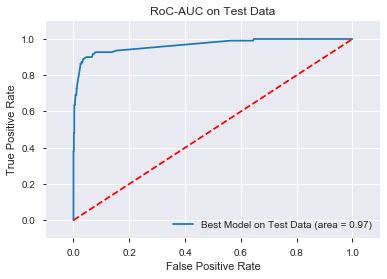

--------------------------------------------------------------------------
Wall time: 7.64 s
Cross Validation Accuracy :  95.46
Cross Validation Accuracy in every fold :  [98.81 95.24 95.24 97.62 91.67 96.43 96.43 95.18 92.77 95.18]


In [35]:
#Extracting the best parameters and score
print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

#Applying the tuned parameters back to the model
Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

Grid-Search hyperparameter tuning on Random Forest Classifier

In [36]:
grid_params = {'n_estimators' : [100,200,300,400,500],
               'max_depth' : [10, 7, 5, 3],
               'criterion' : ['entropy', 'gini']}

RFC = RandomForestClassifier()
grid_object = GridSearchCV(estimator = RFC, param_grid = grid_params, scoring = 'roc_auc', cv = 10, n_jobs = -1)

%time grid_object.fit(X_train, Y_train)

Wall time: 3min 5s


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

Best_ROC-AUC :  96.0
Best model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 Confusion Matrix


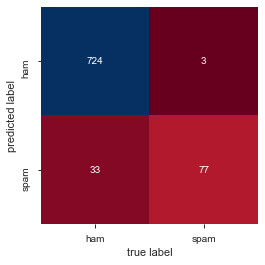


 Classification Report 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       727
           1       0.96      0.70      0.81       110

    accuracy                           0.96       837
   macro avg       0.96      0.85      0.89       837
weighted avg       0.96      0.96      0.95       837

Overall Accuracy :  95.7
Precision Score :  96.25
Recall Score :  70.0
AUC :  96.41 



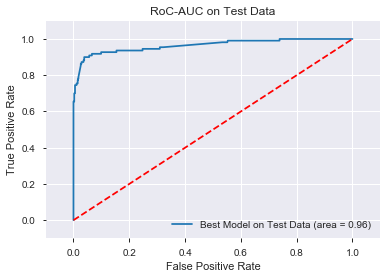

--------------------------------------------------------------------------
Wall time: 5.88 s
Cross Validation Accuracy :  94.98
Cross Validation Accuracy in every fold :  [98.81 94.05 94.05 97.62 95.24 95.24 94.05 92.77 92.77 95.18]


In [37]:
# print("Best Parameters : ", grid_object.best_params_)
print("Best_ROC-AUC : ", round(grid_object.best_score_ * 100, 2))
print("Best model : ", grid_object.best_estimator_)

Y_pred = grid_object.best_estimator_.predict(X_test)
probs = grid_object.best_estimator_.predict_proba(X_test)
clf_report(Y_test, Y_pred, probs)

kfold = KFold(n_splits=10, random_state=25, shuffle=True)
%time results = cross_val_score(grid_object.best_estimator_, X_test, Y_test, cv=kfold)
results = results * 100
results = np.round(results,2)
print("Cross Validation Accuracy : ", round(results.mean(), 2))
print("Cross Validation Accuracy in every fold : ", results)

# Approach 2 : PyCaret

Stage1 : Data setup and Preprocessing

In [38]:
df1 = pd.read_csv('/SMS_Spam_Ham_Raw.csv')

In [39]:
df1.head()

,Flag,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df1.columns

Index(['Flag', 'SMS '], dtype='object')

In [41]:
df1.rename(columns={'SMS ':'SMS'}, inplace=True)

In [42]:
from nltk.corpus import stopwords

In [43]:
stop_words = stopwords.words('english')

In [44]:
from pycaret.nlp import *

In [45]:
%time su_1 = setup(data = df1, target = 'SMS', custom_stopwords=stop_words, session_id=21) 

Description,Value
session_id,21
# Documents,5574
Vocab Size,4194
Custom Stopwords,True


Wall time: 23.7 s


Stage 2 : Embedding on the processed text data

In [46]:
%time m1 = create_model(model='lda', multi_core=True)

Wall time: 16.6 s


In [47]:
%time lda_data = assign_model(m1) 

Wall time: 7.28 s


In [48]:
lda_data.head()

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point crazy available get,0.043271,0.275284,0.226826,0.454620,Topic 3,0.45
1,ham,,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
2,spam,free entry wkly final may text receive entry q...,0.018010,0.018067,0.192741,0.771182,Topic 3,0.77
3,ham,say early hor already say,0.872723,0.043728,0.041717,0.041833,Topic 0,0.87
4,ham,go life around though,0.698088,0.200520,0.051305,0.050087,Topic 0,0.70


In [49]:
evaluate_model(m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [50]:
%time m2 = create_model(model='nmf', multi_core=True)

Wall time: 309 ms


In [51]:
%time nmf_data = assign_model(m2) 

Wall time: 5.37 s


In [52]:
lda_data.head()

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point crazy available get,0.043271,0.275284,0.226826,0.454620,Topic 3,0.45
1,ham,,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
2,spam,free entry wkly final may text receive entry q...,0.018010,0.018067,0.192741,0.771182,Topic 3,0.77
3,ham,say early hor already say,0.872723,0.043728,0.041717,0.041833,Topic 0,0.87
4,ham,go life around though,0.698088,0.200520,0.051305,0.050087,Topic 0,0.70


In [53]:
lda_data.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [54]:
lda_data.drop(['SMS', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
lda_data.head()

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.043271,0.275284,0.226826,0.454620
1,ham,0.250000,0.250000,0.250000,0.250000
2,spam,0.018010,0.018067,0.192741,0.771182
3,ham,0.872723,0.043728,0.041717,0.041833
4,ham,0.698088,0.200520,0.051305,0.050087


In [55]:
nmf_data.head()

,Flag,SMS,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,ham,go point crazy available get,0.000664,0.049582,0.002396,0.002883,Topic 1,0.89
1,ham,,0.000000,0.000000,0.000000,0.000000,Topic 0,NaN
2,spam,free entry wkly final may text receive entry q...,0.001407,0.000484,0.000686,0.001194,Topic 0,0.37
3,ham,say early hor already say,0.001594,0.003458,0.002559,0.004286,Topic 3,0.36
4,ham,go life around though,0.000000,0.059109,0.000000,0.000000,Topic 1,1.00


In [56]:
nmf_data.columns

Index(['Flag', 'SMS', 'Topic_0', 'Topic_1', 'Topic_2', 'Topic_3',
       'Dominant_Topic', 'Perc_Dominant_Topic'],
      dtype='object')

In [57]:
nmf_data.drop(['SMS', 'Dominant_Topic', 'Perc_Dominant_Topic'], axis=1, inplace = True)
nmf_data.head()

,Flag,Topic_0,Topic_1,Topic_2,Topic_3
0,ham,0.000664,0.049582,0.002396,0.002883
1,ham,0.000000,0.000000,0.000000,0.000000
2,spam,0.001407,0.000484,0.000686,0.001194
3,ham,0.001594,0.003458,0.002559,0.004286
4,ham,0.000000,0.059109,0.000000,0.000000


Stage 3 : Model Building

In [58]:
from pycaret.classification import *

In [68]:
%time pce_1 = setup(data = lda_data, target = 'Flag', session_id = 5, train_size = 0.85) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5
1,Target Type,Binary
2,Label Encoded,"ham: 0, spam: 1"
3,Original Data,"(5574, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Wall time: 4.48 s


In [69]:
%time compare_models()

Wall time: 1min 9s


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9411,0.935,0.7165,0.8236,0.7656,0.7321
1,Light Gradient Boosting Machine,0.9386,0.9483,0.7148,0.8084,0.7569,0.722
2,Extra Trees Classifier,0.9371,0.9466,0.7385,0.7834,0.7584,0.7224
3,CatBoost Classifier,0.9354,0.9448,0.6851,0.8062,0.7395,0.703
4,Decision Tree Classifier,0.927,0.8482,0.7527,0.723,0.7351,0.6929
5,Gradient Boosting Classifier,0.9255,0.9368,0.6188,0.781,0.6891,0.6475
6,Extreme Gradient Boosting,0.9244,0.9403,0.5889,0.7954,0.6756,0.634
7,K Neighbors Classifier,0.9166,0.9035,0.6173,0.7233,0.6645,0.6173
8,Ada Boost Classifier,0.9164,0.9272,0.5779,0.7436,0.649,0.6025
9,SVM - Linear Kernel,0.8966,0,0.4332,0.6995,0.5259,0.4721


Stage 4 : Hyper-parameters tuning

In [70]:
#step1 : model creation
%time pce_1_m1 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9473,0.9570,0.7302,0.8519,0.7863,0.7564
1,0.9473,0.9325,0.7143,0.8654,0.7826,0.7529
2,0.9494,0.9581,0.7344,0.8704,0.7966,0.7679
3,0.9494,0.9407,0.7031,0.9000,0.7895,0.7612
4,0.9325,0.9415,0.7031,0.7759,0.7377,0.6991
5,0.9325,0.9361,0.7344,0.7581,0.7460,0.7071
6,0.9473,0.9481,0.7500,0.8421,0.7934,0.7633
7,0.9239,0.9088,0.6667,0.7368,0.7000,0.6565
8,0.9471,0.9278,0.7619,0.8276,0.7934,0.7631
9,0.9345,0.8999,0.6667,0.8077,0.7304,0.6935


Wall time: 1.99 s


In [71]:
#step2 : model tuning
%time tuned_pce_1_m1 = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9536,0.9673,0.8095,0.8361,0.8226,0.7959
1,0.9494,0.8819,0.7302,0.8679,0.7931,0.7645
2,0.9473,0.9734,0.7500,0.8421,0.7934,0.7633
3,0.9451,0.9357,0.7500,0.8276,0.7869,0.7555
4,0.9325,0.9379,0.7812,0.7353,0.7576,0.7184
5,0.9367,0.9366,0.7656,0.7656,0.7656,0.7290
6,0.9494,0.9576,0.7656,0.8448,0.8033,0.7743
7,0.9345,0.9303,0.7460,0.7581,0.7520,0.7142
8,0.9493,0.9278,0.8254,0.8000,0.8125,0.7832
9,0.9323,0.9488,0.6508,0.8039,0.7193,0.6813


Wall time: 20.5 s


In [72]:
#step3 : getting insights from model perfromance
%time evaluate_model(tuned_pce_1_m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Wall time: 81.1 ms


Repeating the above process of model building and tuning for the NMF embedded data 

In [64]:
%time pce_2 = setup(data = nmf_data, target = 'Flag', session_id = 5, train_size = 0.85) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5
1,Target Type,Binary
2,Label Encoded,"ham: 0, spam: 1"
3,Original Data,"(5574, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Wall time: 4.1 s


In [65]:
%time compare_models()

Wall time: 1min 13s


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9377,0.9463,0.6755,0.83,0.7433,0.7084
1,Random Forest Classifier,0.9314,0.9124,0.6456,0.8065,0.7159,0.6775
2,Light Gradient Boosting Machine,0.9303,0.93,0.6676,0.7858,0.7207,0.6812
3,CatBoost Classifier,0.9263,0.9286,0.6236,0.7862,0.6944,0.6532
4,Gradient Boosting Classifier,0.9164,0.9178,0.5275,0.7802,0.6282,0.5831
5,Extreme Gradient Boosting,0.9132,0.912,0.5119,0.7687,0.6125,0.5659
6,Decision Tree Classifier,0.9101,0.812,0.6946,0.6554,0.6739,0.6218
7,Ada Boost Classifier,0.9078,0.903,0.4802,0.743,0.5817,0.5327
8,K Neighbors Classifier,0.8987,0.8804,0.5405,0.647,0.5879,0.5308
9,Logistic Regression,0.8659,0.7812,0,0,0,0


In [66]:
#step2 : model tuning
%time tuned_pce_2_m1 = tune_model('et', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9241,0.9090,0.5238,0.8462,0.6471,0.6071
1,0.9093,0.9227,0.4762,0.7500,0.5825,0.5345
2,0.9262,0.9333,0.5469,0.8537,0.6667,0.6274
3,0.9177,0.9519,0.4844,0.8378,0.6139,0.5715
4,0.9262,0.9282,0.5156,0.8919,0.6535,0.6154
5,0.9198,0.9397,0.4844,0.8611,0.6200,0.5791
6,0.9177,0.9368,0.5312,0.7907,0.6355,0.5911
7,0.9218,0.9337,0.4921,0.8611,0.6263,0.5862
8,0.9260,0.9406,0.5556,0.8333,0.6667,0.6269
9,0.9323,0.9413,0.5238,0.9429,0.6735,0.6391


Wall time: 8.23 s


In [67]:
#step3 : getting insights from model perfromance
%time evaluate_model(tuned_pce_2_m1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Wall time: 76.1 ms
